### Supervised learning

In [13]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
#plt.style.use('ggplot')

### Exploratory data analysis

In [14]:
# Iris dataset in scikit-learn
iris = datasets.load_iris()

In [15]:
type(iris)

sklearn.utils.Bunch

In [16]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [17]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [18]:
iris.data.shape

(150, 4)

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
# EDA
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


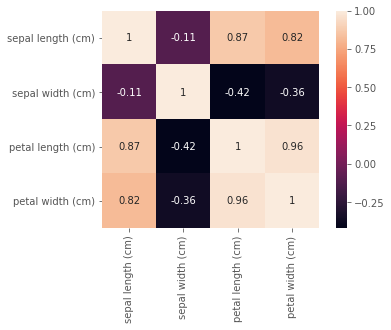

In [21]:
sns.heatmap(df.corr(), square=True, annot=True,robust=True, yticklabels=1)

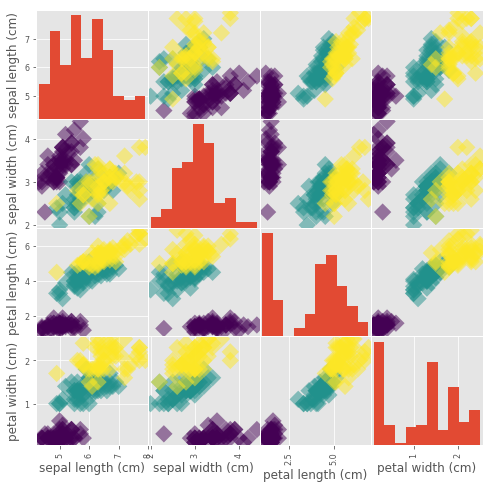

In [22]:
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker='D')
plt.show() # c is color

In [27]:
# EXERCISE

In [28]:
# Numerical EDA
# Predict party affiliation based on votes 
# made by US House of Representatives Congressmen
#https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

df = pd.read_csv('datasets/house-votes-84.csv',header=None)
df.columns = ['party','infants','water','budget','physician',
              'salvador','religious','satellite','aid','missile',
              'immigration','synfuels','education','superfund',
              'crime','duty_free_exports','eaa_rsa']
df.replace({'n':0,'y':1,'?':0},inplace=True)

FileNotFoundError: File b'datasets/house-votes-84.csv' does not exist

In [26]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(16), object(1)
memory usage: 57.9+ KB


In [14]:
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.448276,0.581609,0.406897,0.487356,0.625287,0.549425,0.556322,0.475862,0.496552,0.344828,0.393103,0.480460,0.570115,0.400000,0.618391
std,0.495630,0.497890,0.493863,0.491821,0.500416,0.484606,0.498124,0.497390,0.499992,0.500564,0.475859,0.489002,0.500193,0.495630,0.490462,0.486341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


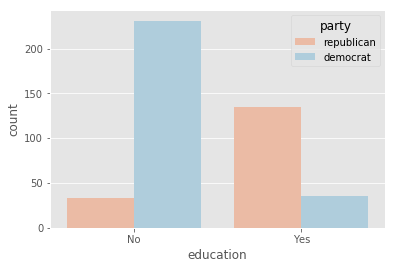

In [15]:
# Visual EDA
# Vote behavior on Education bills
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Democrats voted resoundingly against this bill, compared to Republicans. 

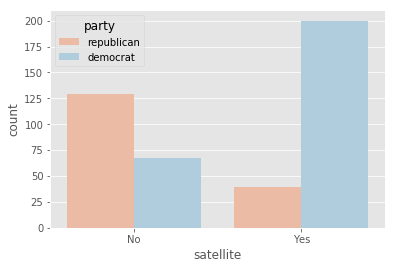

In [16]:
# Vote behavior on Satellite bills
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Mixed voting pattern on this bill.

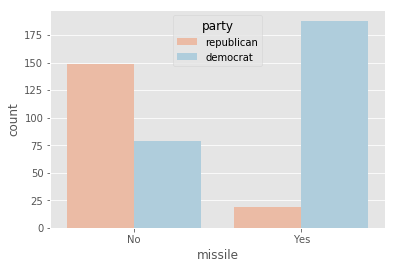

In [17]:
# Vote behavior on Missile bills
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Again mixed voting behavior on missile bill.

### The classification challenge

In [18]:
# K-Nearest Neighbors

In [19]:
# Iris dataset
df_iris = pd.concat([pd.DataFrame(iris.data),pd.DataFrame(iris.target)],axis=1)
df_iris.columns = iris.feature_names + ['species']

In [20]:
setosa = df_iris[df_iris.species==0]
versicolor = df_iris[df_iris.species==1]
virginica = df_iris[df_iris.species==2]

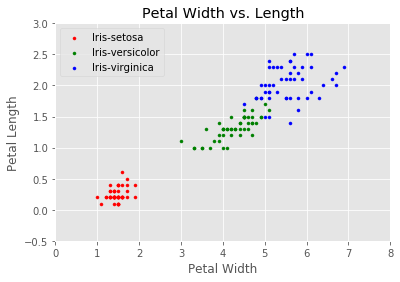

In [21]:
plt.scatter(setosa['petal length (cm)'],setosa['petal width (cm)'],
            marker='.',color='red',label='Iris-setosa')
plt.scatter(versicolor['petal length (cm)'],versicolor['petal width (cm)'],
            marker='.',color='green',label='Iris-versicolor')
plt.scatter(virginica['petal length (cm)'],virginica['petal width (cm)'],
            marker='.',color='blue',label='Iris-virginica')
plt.xlim([0,8])
plt.ylim([-0.5,3.0])
plt.legend.numpoints=3
plt.legend(loc='upper left')
plt.title('Petal Width vs. Length')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.show()

Requirements for Scikit-Learn:
- Data provided as Numpy array or Pandas dataframe
- Features take continuous values
- No missing values in the data
- Features in an array with each column a variable 
  and each row an observation/data-point
- Feature and target no. of rows must match.

In [22]:
# Using scikit-learn to fit a classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [23]:
print(iris['data'].shape)
print(iris['target'].shape)

(150, 4)
(150,)


In [24]:
X_new = np.array([[ 15.2,  13.4,  11.3,  10.3],
                  [ 4.2,  2.8,  1.4,  0.1]])
X_new.shape

(2, 4)

In [25]:
prediction = knn.predict(X_new)
print('Prediction {}'.format(prediction))

Prediction [2 0]


In [26]:
# EXERCISES

In [27]:
# k-Nearest Neighbors: Fit

df = pd.read_csv('datasets/house-votes-84.csv',header=None)
df.columns = ['party','infants','water','budget','physician',
              'salvador','religious','satellite','aid','missile',
              'immigration','synfuels','education','superfund',
              'crime','duty_free_exports','eaa_rsa']
df.replace({'n':0,'y':1,'?':0},inplace=True)

In [28]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [29]:
X_new = pd.DataFrame([0.700181,0.620683,0.916841,0.722895,0.272337,
                      0.660382,0.250985,0.75609,0.784475,0.752666,
                      0.074864,0.597837,0.647635,0.685137,0.739113,
                      0.417089]).T

In [30]:
# k-Nearest Neighbors: Predict

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


### Measuring model performance

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#print("Test set predictions:\n {}".format(y_pred))
knn.score(X_test, y_test)

0.9541984732824428

In [32]:
# EXERCISES

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

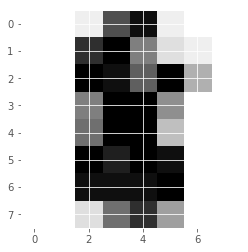

In [58]:
# The digits recognition dataset
# http://yann.lecun.com/exdb/mnist/

# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [66]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [34]:
# Train/Test Split + Fit/Predict/Accuracy

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


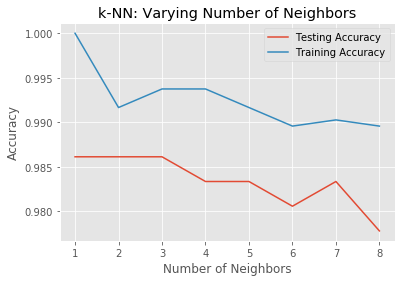

In [35]:
# Overfitting and underfitting

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [36]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
plt.style.use('ggplot')

### Regression

In [37]:
# Boston housing data
# https://www.kaggle.com/c/boston-housing
boston = pd.read_csv('datasets/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [38]:
# Creating feature and target arrays
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

In [39]:
# Predicting house value from a single feature
X_rooms = X[:,5]
print(type(X_rooms), type(y))
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


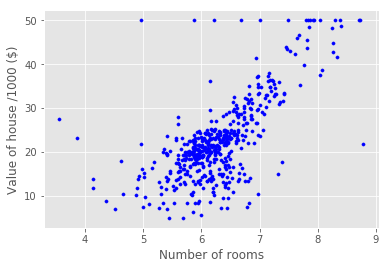

In [40]:
# Plotting house value vs. number of rooms
plt.scatter(X_rooms, y, s=10, c='blue')
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

In [41]:
# Fitting a regression model

import numpy as np
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms),
                               max(X_rooms)).reshape(-1, 1)

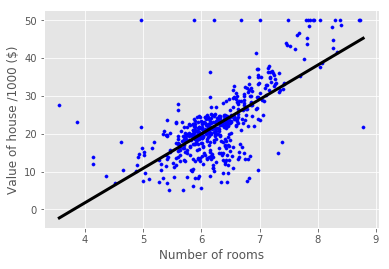

In [42]:
plt.scatter(X_rooms, y, color='blue', s=10)
plt.plot(prediction_space, reg.predict(prediction_space),
         color='black', linewidth=3)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

In [43]:
# EXERCISES

In [44]:
# Importing data for supervised learning
# Gapminder Countries GDP data

# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


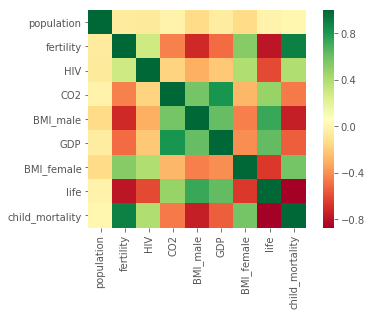

In [45]:
# Exploring the Gapminder data

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

In [46]:
# Linear regression on all features

X_train, X_test, y_train, y_test = \
train_test_split(X, y,test_size = 0.3, random_state=42)

reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7298987360907498

In [47]:
# EXERCISE

In [48]:
# Fit & predict for regression

# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values.reshape(-1,1)
X_fertility = df['fertility'].values.reshape(-1,1)

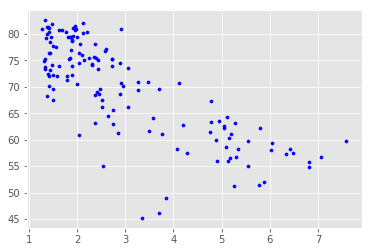

In [49]:
plt.scatter(X_fertility,y,c='blue',s=10);

0.6192442167740035


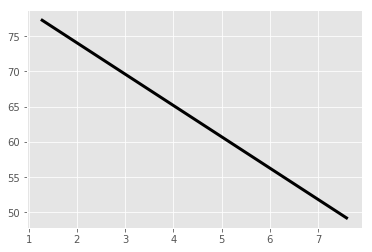

In [50]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [51]:
# Train/test split for regression

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907498
Root Mean Squared Error: 4.194027914110239


### Cross-validation

In [52]:
from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)
np.mean(cv_results)

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]


0.6168819644425119

In [53]:
# EXERCISE

In [54]:
# 5-fold cross-validation

# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


In [55]:
%timeit cv_scores = cross_val_score(reg,X,y,cv=5)

12.3 ms ± 807 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [56]:
%timeit cv_scores = cross_val_score(reg,X,y,cv=20)

46.8 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Regularized regression

**Ridge regression** takes the sum of the squared values of the coefficients multiplied by some alpha, this is also known as the L2 regularization. 

In [57]:
# Ridge regression in scikit-learn

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.7400155738397822

**Lasso regression** performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients.

In [58]:
# Lasso regression in scikit-learn

from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.7391302460088129

In [59]:
# Lasso for feature selection in scikit-learn

X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

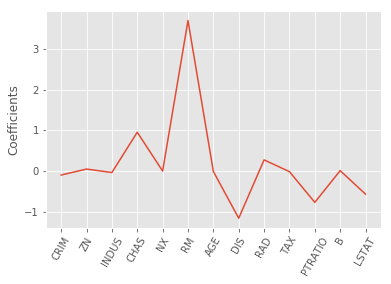

In [60]:
from sklearn.linear_model import Lasso

names = boston.drop('MEDV', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

In [61]:
# EXERCISES

In [62]:
# Regularization I: Lasso

df_columns = df.drop(['life','Region'],axis=1).columns
X = df.drop(['life','Region'],axis=1).values
y = df['life'].values
df_columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


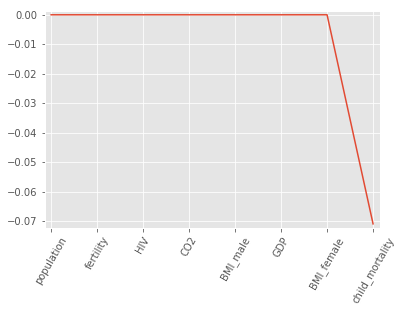

In [63]:
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [64]:
# Regularization II: Ridge
# fitting ridge regression models over a range of different alphas, and plot cross-validated R^2 scores for each.

In [65]:
# function to visualize the scores and standard deviations
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

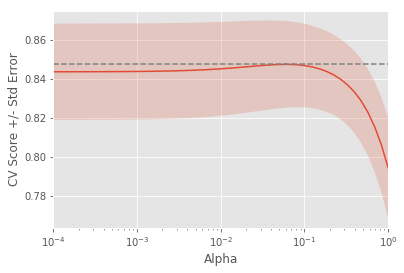

In [66]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? 

# Fine-tuning your model

### How good is your model?

In [67]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
plt.style.use('ggplot')

In [68]:
# Confusion matrix in scikit-learn

df = pd.read_csv('datasets/house-votes-84.csv',header=None)
df.columns = ['party','infants','water','budget','physician',
              'salvador','religious','satellite','aid','missile',
              'immigration','synfuels','education','superfund',
              'crime','duty_free_exports','eaa_rsa']
df.replace({'n':0,'y':1,'?':0},inplace=True)

In [69]:
y = df['party'].values
X = df.drop('party', axis=1).values

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [71]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[108   7]
 [  6  53]]
             precision    recall  f1-score   support

   democrat       0.95      0.94      0.94       115
 republican       0.88      0.90      0.89        59

avg / total       0.93      0.93      0.93       174



In [72]:
# EXERCISES

In [73]:
# Metrics for classification
# computing a confusion matrix and generating a classification report
# https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

df = pd.read_csv('datasets/diabetes.csv')
y = df['diabetes'].values
X = df.drop('diabetes',axis=1).values

In [74]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308



### Hyperparameter tuning

In [75]:
# GridSearchCV in scikit-learn

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 14}
0.7578125


In [76]:
# EXERCISES

In [77]:
# Hyperparameter tuning with GridSearchCV

df = pd.read_csv('datasets/diabetes.csv')
y = df['diabetes']
X = df.drop('diabetes',axis=1)

In [78]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 163789.3706954068}
Best score is 0.7721354166666666


In [79]:
# Hyperparameter tuning with RandomizedSearchCV

# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 4}
Best score is 0.7395833333333334


# Linear Classifiers

In [80]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

digits = datasets.load_digits()
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
print(lr.score(Xtrain, ytrain))
print(lr.score(Xtest, ytest))
print("\n")
# Apply Linear SVM and print scores
svm = LinearSVC()
svm.fit(Xtrain, ytrain)
print(svm.score(Xtrain, ytrain))
print(svm.score(Xtest, ytest))

print("\n")
# Apply SVM and print scores
svm = SVC()
svm.fit(Xtrain, ytrain)
print(svm.score(Xtrain, ytrain))
print(svm.score(Xtest, ytest))

0.9962880475129918
0.9577777777777777


0.9910913140311804
0.9444444444444444


1.0
0.35333333333333333


In [81]:
#Visualizing the decision boundaries

Automatically created module for IPython interactive environment


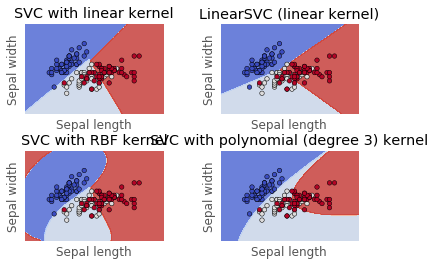

In [82]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [83]:
x=np.arange(3)
y=np.arange(3,6)
print(x)
print(y)

[0 1 2]
[3 4 5]


In [84]:
x*y

array([ 0,  4, 10])

In [85]:
#Dot Product
x@y

14

In [86]:
np.sum(x*y)

14

In [87]:
#Raw Model Output = Coefficient.Features + Intercept [Dot Product of coefficients and features]
#If positive predict one class, else predict another class

In [88]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

digits = datasets.load_digits()
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
print(lr.score(Xtrain, ytrain))
print(lr.score(Xtest, ytest))
print()

0.9948032665181886
0.9622222222222222



In [89]:
print(lr.coef_)

[[ 0.00000000e+00 -4.69099414e-02 -7.56316659e-02  1.13823954e-02
  -1.55923123e-01 -2.75685485e-01 -1.67354209e-01 -1.58190505e-02
  -2.00507128e-05 -1.65123315e-01 -3.13490323e-02  1.30865162e-01
   1.47500086e-01  3.29840132e-01 -2.44557837e-02 -1.82434677e-02
  -6.88401356e-05  5.45245415e-02  1.19905149e-01 -6.41388525e-02
  -2.99818957e-01  2.17365291e-01 -1.24891714e-02 -1.26174063e-02
  -3.07688429e-05  9.34144795e-02 -3.86972939e-02 -2.65727480e-01
  -4.83445948e-01 -4.78864383e-02  2.09328403e-01 -1.23510017e-05
   0.00000000e+00  2.48878515e-01  1.59803647e-01 -2.62434124e-01
  -4.64075858e-01 -1.39821976e-02  5.56618895e-02  0.00000000e+00
  -2.42341761e-04 -3.32649658e-02  1.72896719e-01 -2.37387649e-01
  -3.63188658e-01 -5.13243468e-02  1.12751482e-01 -1.10751295e-04
  -1.96256361e-05 -5.57865185e-02  4.29299292e-02  8.88419800e-02
   8.07326415e-02  9.41035703e-02 -1.15736499e-01 -1.01502573e-02
  -6.54187871e-06 -4.01416302e-02 -1.56248656e-01 -3.09145114e-02
  -2.94703

In [90]:
print(lr.intercept_)

[-0.01747797 -2.75024931 -0.03005314 -0.14687138  0.01123003 -0.05276059
 -0.04961377 -0.01720716 -2.64335179 -0.81062231]


In [91]:
#Loss Functions

In [92]:
from scipy.optimize import minimize

In [93]:
minimize(np.square,0).x

array([0.])

In [94]:
minimize(np.square,2).x

array([-1.88846401e-08])

In [95]:
# Boston housing data
# https://www.kaggle.com/c/boston-housing
boston = pd.read_csv('datasets/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [96]:
# Creating feature and target arrays
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

In [97]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        predicted_y_i = w@X[i]
        s = s + (predicted_y_i - y[i])**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.28967446e-02  4.87153302e-02 -4.05650740e-03  2.85399149e+00
 -2.86845841e+00  5.92815484e+00 -7.26925691e-03 -9.68513359e-01
  1.71156288e-01 -9.39662529e-03 -3.92186855e-01  1.49054836e-02
 -4.16304052e-01]
[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


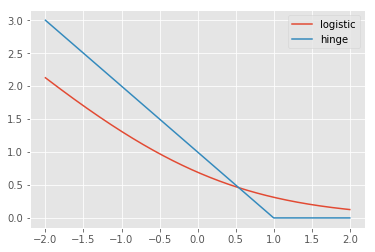

In [98]:
# Mathematical functions for logistic and hinge losses
# Feel free to ignore if you're not interested
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

In [99]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

digits = datasets.load_digits()
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
print(lr.score(Xtrain, ytrain))
print(lr.score(Xtest, ytest))
print("\n")

0.9970304380103935
0.9733333333333334




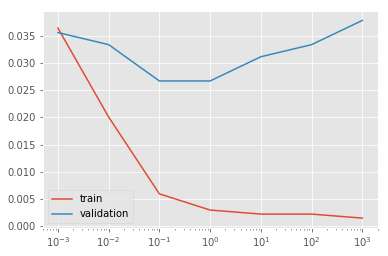

In [100]:
train_errs=[]
valid_errs=[]
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Loop over values of C
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(Xtrain, ytrain)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(Xtrain, ytrain) )
    valid_errs.append( 1.0 - lr.score(Xtest, ytest) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

In [101]:
#As you can see, too much regularization (small C) doesn't work well - due to underfitting - 
#and too little regularization (large C) doesn't work well either - due to overfitting.